In [14]:
import sys
sys.path.append('../..')
import torchvision 
from torchvision import transforms
from torch.utils.data import DataLoader
import torch as ch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import cox
from cox.utils import Parameters
import cox.store as store

from delphi.cifar_models.vgg import vgg11
from delphi import train
from delphi.utils.constants import CIFAR_LABELS, _CIFAR10_STATS, COSINE, CYCLIC
from delphi.utils.helpers import cifar_autoaugment

In [27]:
args = Parameters({ 
    'epochs': 150,
    'num_workers': 8, 
    'batch_size': 128, 
    'lr': 1e-1, 
    'momentum': .9, 
    'weight_decay': 5e-4, 
    'save_ckpt_iters': 50,
    'log_iters': 10,
    'out_dir': '/home/pstefanou/cifar-10-vgg11',
    'custom_lr_multiplier': COSINE, 
    'validation_split': .8,
    'shuffle': True,
})
if ch.cuda.is_available(): 
    args.__setattr__('device', 'cuda:1')
args

{
  "epochs": 150,
  "num_workers": 8,
  "batch_size": 128,
  "lr": 0.1,
  "momentum": 0.9,
  "weight_decay": 0.0005,
  "save_ckpt_iters": 50,
  "log_iters": 10,
  "out_dir": "/home/pstefanou/cifar-10-vgg11",
  "custom_lr_multiplier": "cosine",
  "validation_split": 0.8,
  "shuffle": true,
  "device": "cuda:1"
}

In [23]:
# load dataset
train_data = torchvision.datasets.CIFAR10('/home/pstefanou/', train=True, 
                                          transform=cifar_autoaugment(input_size=32, padding=4, normalize=None))
test_data = torchvision.datasets.CIFAR10('/home/pstefanou', train=False, transform=transforms.ToTensor())


# generate random indices for trianing and validation sets 
indices = list(range(len(train_data)))
split = math.floor(args.validation_split*len(train_data))
train_indices, val_indices = indices[:split], indices[split:]

# define data loaders
train_loader = DataLoader(train_data, batch_size=args.batch_size, num_workers=args.num_workers, shuffle=args.shuffle)
val_loader = DataLoader(train_data, batch_size=args.batch_size, num_workers=args.num_workers, shuffle=args.shuffle)

test_loader = DataLoader(test_data, batch_size=args.batch_size, num_workers=args.num_workers)

# Explore Dataset


label: airplane


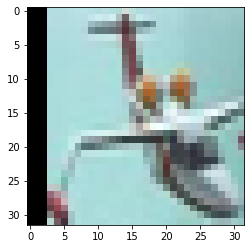

label: deer


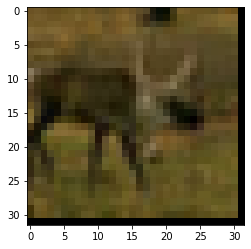

label: ship


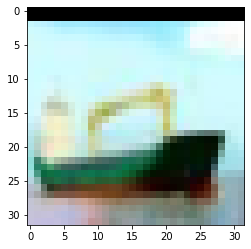

label: frog


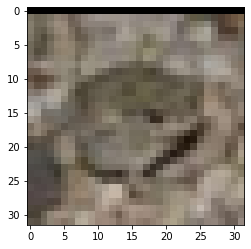

label: automobile


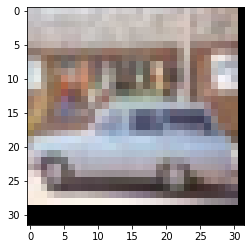

label: truck


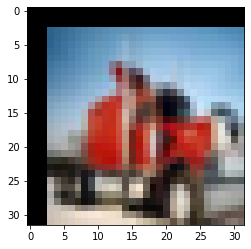

label: bird


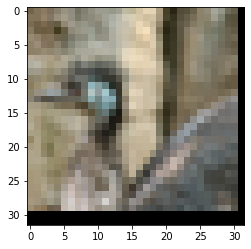

label: horse


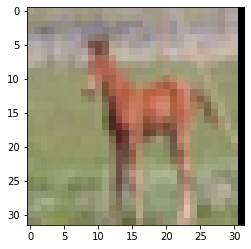

label: dog


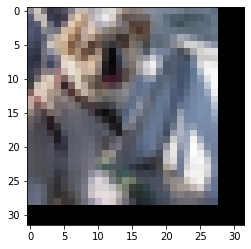

label: cat


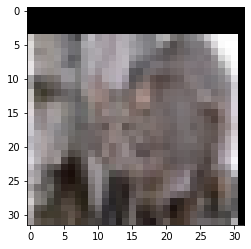

In [24]:
labels = {i for i in range(10)}
for image, target in train_loader: 
    for j in range(len(target)): 
        im, targ = image[j], target[j]
        if targ.item() in labels: 
            print("label: {}".format(CIFAR_LABELS[targ.item()]))
            plt.imshow(transforms.ToPILImage(mode="RGB")(im.squeeze(0)))
            plt.show()
            labels.remove(targ.item())
        if len(labels) == 0: 
            break

# Create Output Store

In [25]:
out_store = store.Store(args.out_dir)

Logging in: /home/pstefanou/cifar-10-vgg11/e44d212a-e6f5-4376-8349-fc01149239bc


# Define Model

In [26]:
model = vgg11()
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

# Train Model

In [ ]:
final_model = train.train_model(args, model, (train_loader, val_loader), store=out_store, device=args.device)

In [ ]:
reader = CollectionReader(args.out_dir)
metadata = reader.df('metadata')
logs = reader.df('logs')